## Apresentação 

Olá, participante! Estamos muito felizes por você ter participado do 
nosso curso de Machine Learning! Porém, para ser um profissional que faz um bom uso das técnicas de Machine Learning, não basta conhecer as teorias e os conceitos de diferentes técnicas. É necessário aplicá-las, ou seja, praticar, para que você aprenda a utilizar esses métodos tão incríveis de reconhecimento de padrões e de previsão. Portanto, chegou a hora de botar a mão na massa e aplicar algumas das técnicas que foram vistas durante os 3 workshops.

## Descrição

**IMPORTANTE**: Você ganhará o certificado do curso caso tenha registrado sua presença nas 3 aulas por meio do formulário de avaliação de cada dia e caso realize este projeto.



Vamos partir para a descrição do projeto que você deverá fazer para garantir que você aprendeu como aplicar alguns modelos de Machine Learning e, consequentemente, garantir seu certificado do curso.

Você deverá aplicar 3 diferentes técnicas de Machine Learning (lembrando que no curso foram vistas 6 diferentes técnicas) em um dataset que escolhemos. Lembrando que durante o curso, vimos as seguintes técnicas de Machine Learning:
*   KNN
*   Naive Bayes
*   Regressão Linear
*   Regressão Logística
*   Árvores de Decisão
*   Florestas Aleatórias / Random Forest

Nós escolhemos o dataset das espécies de uma flor chamada Íris. Esse é um dos datasets mais conhecidos encontrado na literatura de reconhecimento de padrões. O dataset contém 3 classes (rótulos) com 50 instâncias cada, em que cada classe se refere a uma espécie de Íris. Assim, temos o seguinte atributo de classe:


Class: Diferentes espécies das plantas 


*   Iris Setosa
*   Iris Versicolour
*   Iris Virginica

E desejamos prever a espécie da Íris (classe) com base nos seguintes atributos:

* **PetalLengthCm:** Comprimento da pétala em cm
* **PetalWidthCm:** Largura da pétala em cm
* **SepalLengthCm:** Comprimento da sépala em cm
* **SepalWidthCm:** Largura da sépala em cm
* **Id:** Identificador daquele indivíduo



Você deve adicionar alguns comentários no seu código descrevendo algumas das justificativas de seus raciocínios aplicados no código. Por exemplo, explicar o que e porquê você está fazendo alguns passos.

Por fim, por meio de comentários no notebook, você deverá, ao final, escrever qual das 3 técnicas escolhidas por você obteve o melhor desempenho, ou seja, que foi mais eficiente. Opcionalmente, seria interessante (para seu próprio conhecimento) justificar a razão daquela técnica ter sido a melhor dentre todas as escolhidas. 


# Análise Íris 
Possui variável alvo do tipo categórica

Utilização de métodos supervisionados: KNN, Naive Bayes e Random Forest

# Bibliotecas

In [138]:
## Pre processamento
from sklearn.preprocessing import MinMaxScaler

## KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

## Naive Bayes
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score

## Random Forest
from sklearn.ensemble import RandomForestClassifier

# Pré processamento

In [139]:
df = pd.read_csv('https://raw.githubusercontent.com/semcovici/Datasets/main/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Removendo coluna Id

In [140]:
#Remover coluna Id
df = df.drop(columns=['Id'])

## Escala variáveis numéricas

In [141]:
df_nums = df[['SepalLengthCm',	'SepalWidthCm',	'PetalLengthCm', 'PetalWidthCm']]
columns_df = df_nums.columns

scaler = MinMaxScaler()
scaler_data = scaler.fit_transform(df_nums)

df_final = pd.DataFrame(scaler_data, columns = columns_df)

##Juntando variáveis numéricas com variável alvo
df_final = pd.concat([df_final, df.Species], axis=1)

# KNN

## Treino com validação cruzada

In [142]:
X = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm']]
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

k_list = [1,3,5,7,9,15]

for k in k_list:
    knn_results = cross_validate(KNeighborsClassifier(n_neighbors=k), 
                              X_train, 
                              y_train, 
                              cv=5, 
                              scoring=['f1_macro'], 
                              return_train_score=True)
    print("K:", 
            k, 
            "| Train F1:", 
            knn_results['train_f1_macro'].mean(),
            "| Validation F1:", 
            knn_results['test_f1_macro'].mean()
    )
    

K: 1 | Train F1: 1.0 | Validation F1: 0.9343118090486511
K: 3 | Train F1: 0.9594149659499507 | Validation F1: 0.9345698951890903
K: 5 | Train F1: 0.957214828458494 | Validation F1: 0.945001915296033
K: 7 | Train F1: 0.9482013415816866 | Validation F1: 0.9437805538115136
K: 9 | Train F1: 0.9503920642126357 | Validation F1: 0.9339087589397188
K: 15 | Train F1: 0.9345247062501052 | Validation F1: 0.915424596043791


## Teste
KNN apresentou bons resultados, com good fit para um k vizinhos relativamente baixo

In [143]:
for i in range(5):
    clf = KNeighborsClassifier(n_neighbors=5) # melhor k
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    knn_resultado = f1_score(y_test, y_pred, average='macro')
    print("Test:", knn_resultado)
    print()

Test: 0.9487179487179488

Test: 0.9487179487179488

Test: 0.9487179487179488

Test: 0.9487179487179488

Test: 0.9487179487179488



# Naive Bayes (Gaussian)

## Treino com validação cruzada

In [144]:
scaler = StandardScaler()

X = scaler.fit_transform(df[['SepalLengthCm','SepalWidthCm','PetalLengthCm']])
y = df['Species']

# Separação dos dados
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

cv_results = cross_validate(GaussianNB(), 
                            X_train, 
                            y_train, 
                            cv=10, 
                            scoring=['f1_macro'], 
                            return_train_score=True)

print("| Train f1_macro:", 
      cv_results['train_f1_macro'].mean(),
      "| Validation f1_macro:", 
      cv_results['test_f1_macro'].mean()
)

| Train f1_macro: 0.8895148663561278 | Validation f1_macro: 0.8779629629629631


## Teste
Apresentou good fit com f1 bom, porém inferior ao KNN

In [145]:
for i in range(5):
    clf = GaussianNB()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    nb_resultado = f1_score(y_test, y_pred, average='macro')
    print("Test:",  nb_resultado)
    print()

Test: 0.8716049382716049

Test: 0.8716049382716049

Test: 0.8716049382716049

Test: 0.8716049382716049

Test: 0.8716049382716049



# Random Forest

## Treino com validação cruzada entre hiperparâmetros

In [152]:
X = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm']]
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

max_samples = [0.5, None]
n_estimators = [100, 200]
max_features = ['sqrt']

for n_estimator in n_estimators:
  for max_sample in max_samples:
    for max_feature in max_features:        
      rf_results = cross_validate(RandomForestClassifier(criterion='entropy', 
                                                         max_samples=max_sample, 
                                                         max_features=max_feature,
                                                         n_estimators=n_estimator), 
                                  X_train, 
                                  y_train, 
                                  cv=10, 
                                  scoring=['f1_macro'], 
                                  return_train_score=True)
      
      print("max_samples:", max_sample, 
            "n_estimators", n_estimator,
            "max_features", max_feature,
            "| Train F1:", rf_results['train_f1_macro'].mean(),
            "| Validation F1:", rf_results['test_f1_macro'].mean()
      )

max_samples: 0.5 n_estimators 100 max_features sqrt | Train F1: 0.9799617912084988 | Validation F1: 0.9065079365079365
max_samples: None n_estimators 100 max_features sqrt | Train F1: 0.9990049751243781 | Validation F1: 0.925952380952381
max_samples: 0.5 n_estimators 200 max_features sqrt | Train F1: 0.9809865454026999 | Validation F1: 0.9067195767195768
max_samples: None n_estimators 200 max_features sqrt | Train F1: 1.0 | Validation F1: 0.916031746031746


## Teste
RF apresentou bom resultado, porém com um pouco de overfit e com um tempo de execução bem maior do que os demais métodos.

Apresentou também muitas variações no resultados, variando até 8%

In [154]:
rf_media = 0

for i in range(5):
    clf = RandomForestClassifier(
        criterion='entropy', 
        max_samples=None, 
        max_features='sqrt',
        n_estimators=100) 
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    rf_resultado = f1_score(y_test, y_pred, average='macro')
    print("Test:", rf_resultado)
    rf_media = rf_media + rf_resultado
    print()
rf_media = rf_media / 5


Test: 0.9487179487179488

Test: 0.9229629629629629

Test: 0.9229629629629629

Test: 0.974320987654321

Test: 0.9484126984126983



# Conclusão final

Através dos resultados expostos teremos o KNN como método escolhido, pois apresentou a melhor e mais estável métrica em relação aos demais métodos e ficou numa faixa muito boa de fitting.

Pontos negativos:

Random Forest: Alto tempo de processamento, alta variação das métricas (cada execução dava um resultado f1 diferente), e devido a isso o fitting também acabou variando muito, mas na maioria dos casos houve overfit.

Naive Bayes: Não foi perceptível pontos negativos, apenas resultado inferior ao KNN.

<AxesSubplot:>

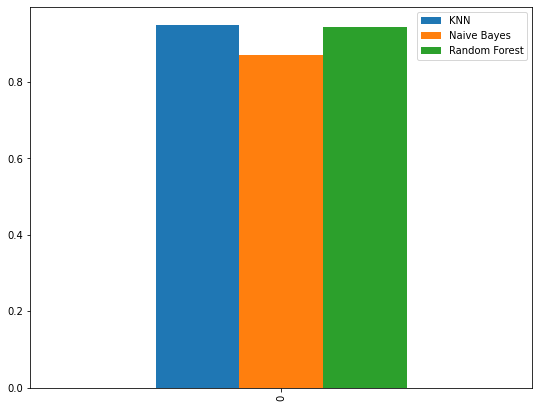

In [155]:
metodos = [[knn_resultado, nb_resultado, rf_media]]

df_metodos = pd.DataFrame(metodos, columns=['KNN', 'Naive Bayes', 'Random Forest'])

df_metodos.plot(kind='bar', figsize=(9,7))